In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1440x1800 with 0 Axes>

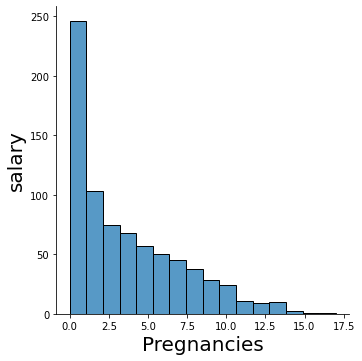

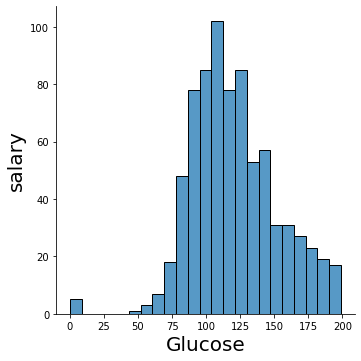

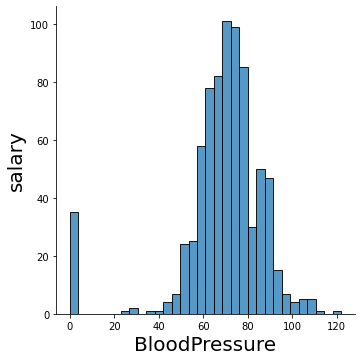

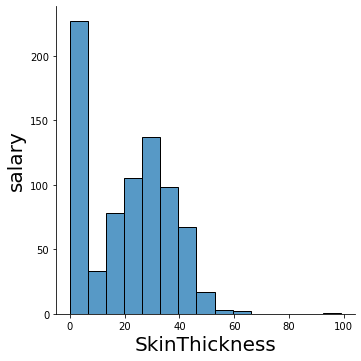

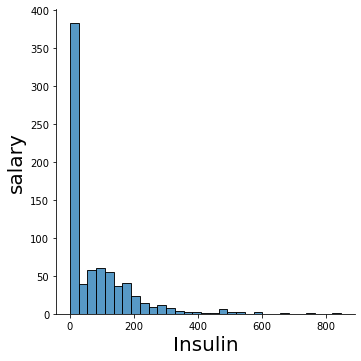

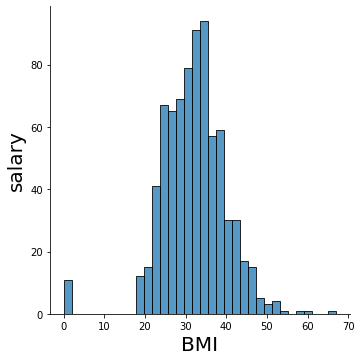

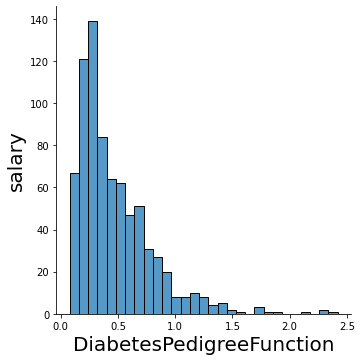

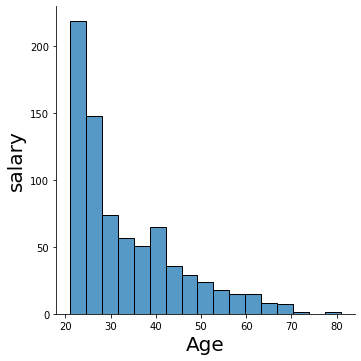

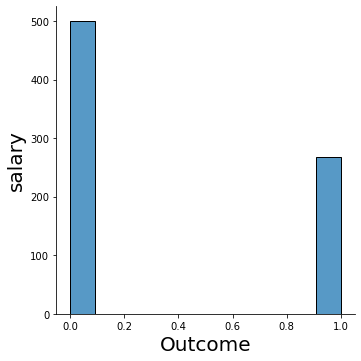

In [10]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=9:
        
        sns.displot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("salary",fontsize=20)
        plotnumber +=1
    plt.show()

In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["Age"]=data["Age"].replace(0,data["Age"].mean())

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1


In [22]:
sns.boxplot(data=data,width=0.5,ax=ax)

<AxesSubplot:>

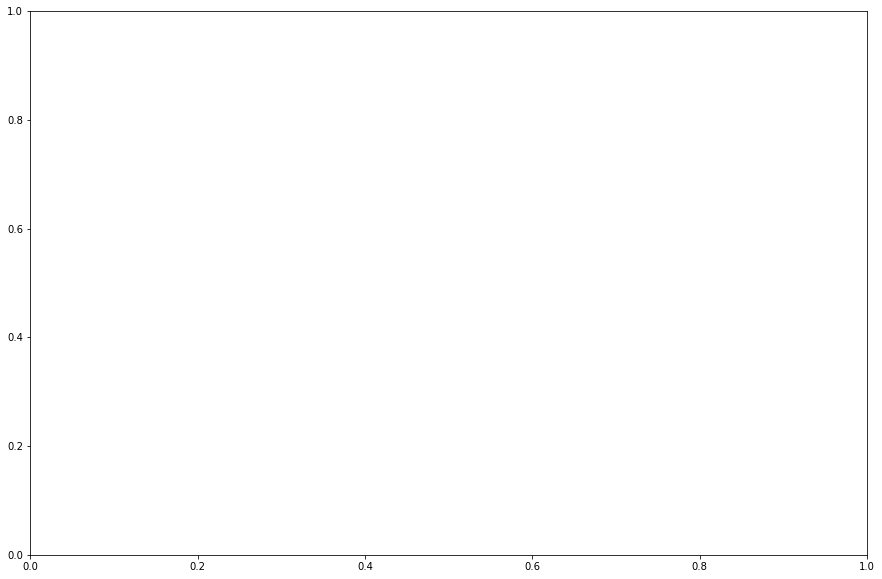

In [20]:
fig,ax=plt.subplots(figsize=(15,10))

In [26]:
sns.boxplot(data=data,width=0.5,fliersize=3,ax=ax)

<AxesSubplot:>

<AxesSubplot:>

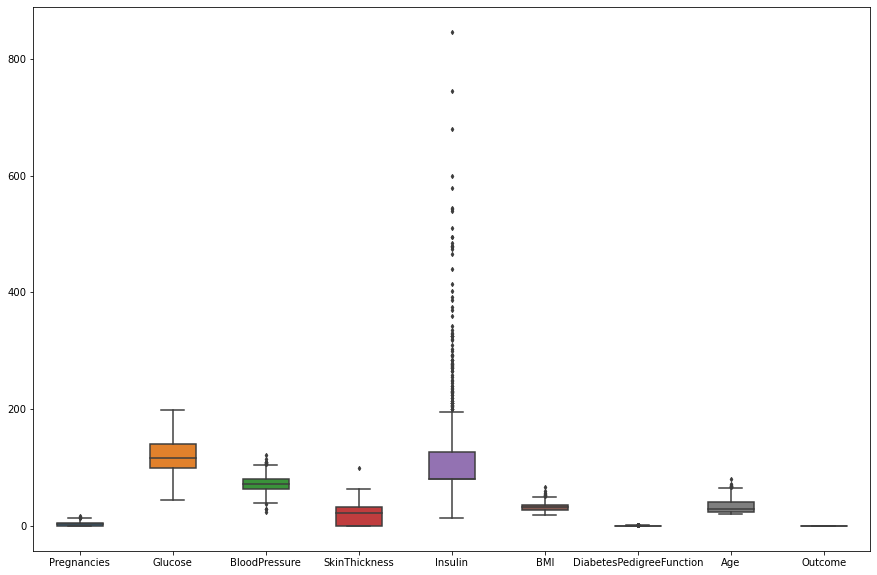

In [28]:
fig=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,fliersize=3)

In [29]:
q=data["BMI"].quantile(0.98)

In [30]:
data_cleaned=data[data["BMI"]<q]

In [32]:
q.shape()

TypeError: 'tuple' object is not callable

In [33]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,0,79.799479,30.1,0.349,47,1


In [49]:
X=data.drop(columns=["Outcome"])

In [50]:
Y=data["Outcome"]

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anacond

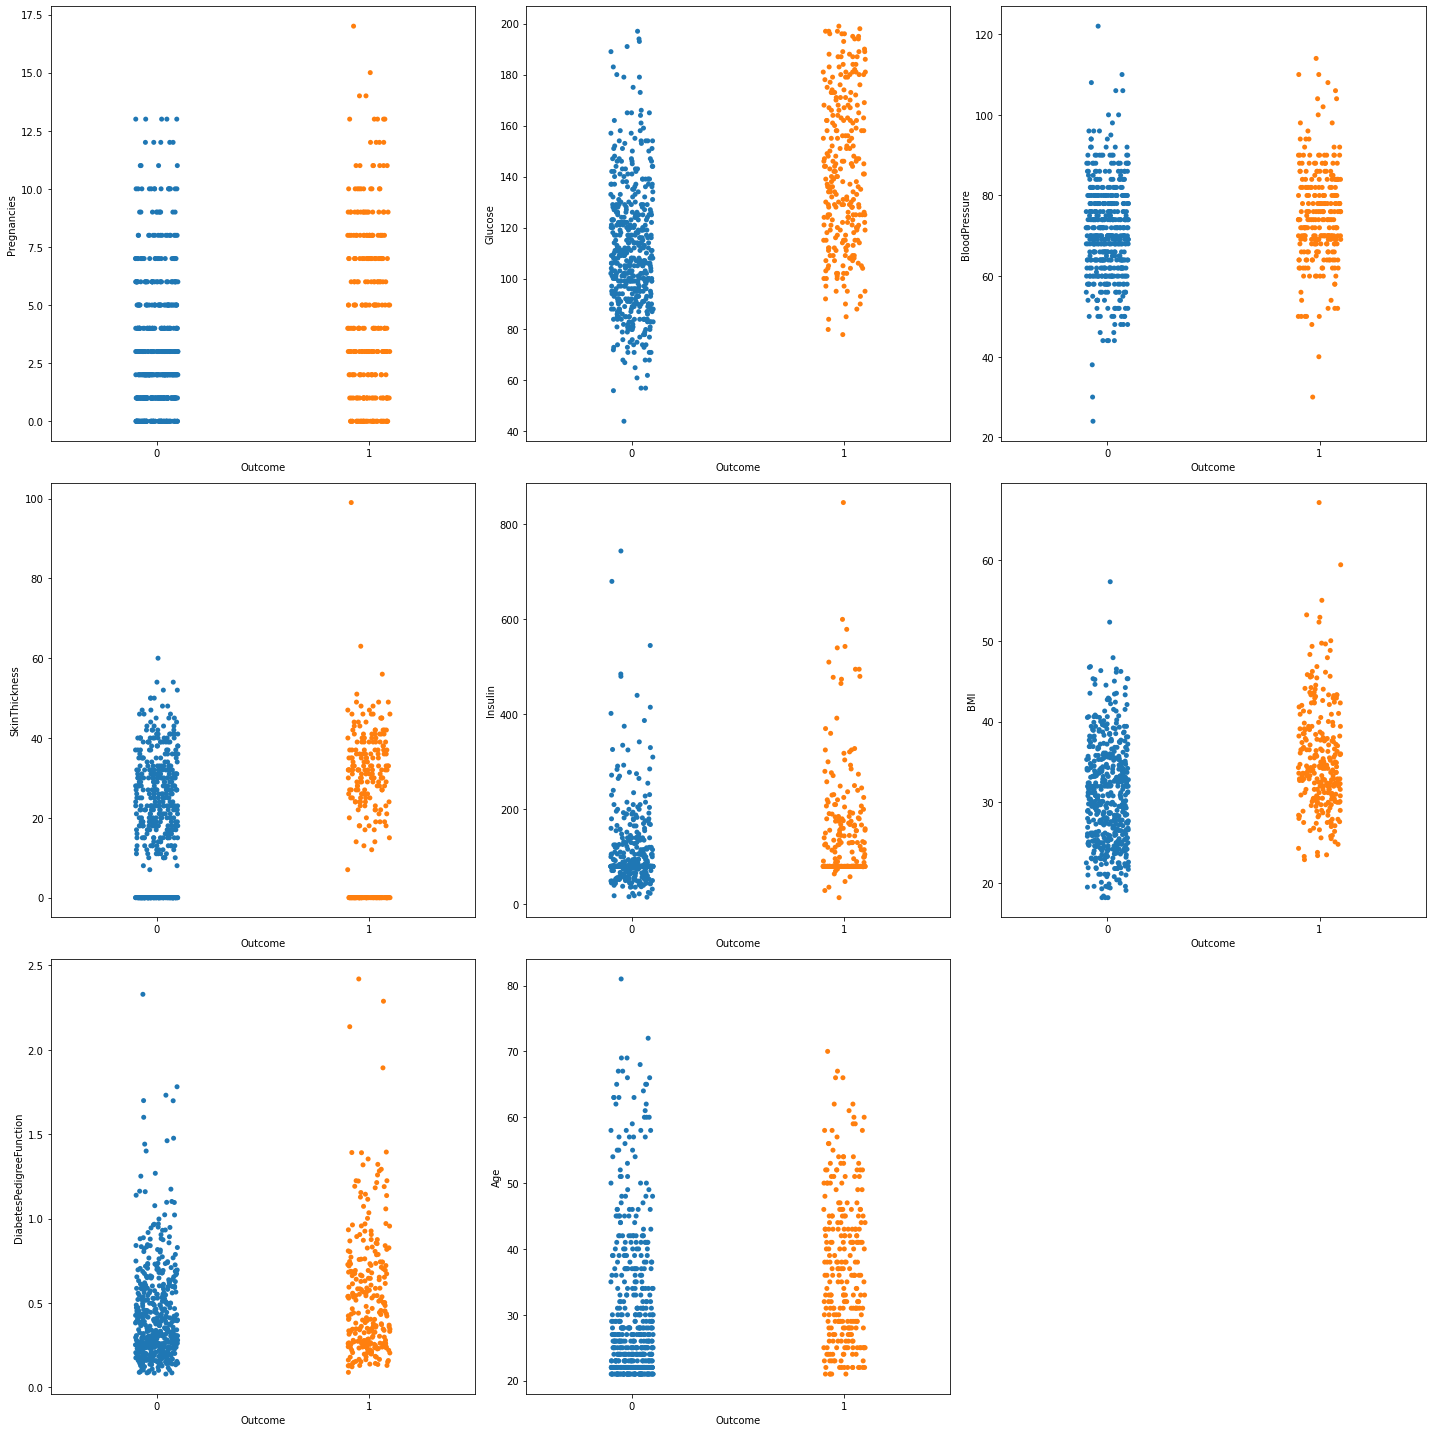

In [42]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(Y,X[column])
    plotnumber +=1
plt.tight_layout()

In [43]:
Scaler=StandardScaler()

In [54]:
X_scaled=Scaler.fit_transform(X)

In [55]:
X_train,Y_train,X_test,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=355)

In [46]:
log_reg=LogisticRegression()

In [56]:
log_reg.fit(X_train,Y_train)

ValueError: y should be a 1d array, got an array of shape (192, 8) instead.

In [52]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,79.799479,33.6,0.627,50
1,1,85.0,66.0,29,79.799479,26.6,0.351,31
2,8,183.0,64.0,0,79.799479,23.3,0.672,32
3,1,89.0,66.0,23,94.000000,28.1,0.167,21
4,0,137.0,40.0,35,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.000000,32.9,0.171,63
764,2,122.0,70.0,27,79.799479,36.8,0.340,27
765,5,121.0,72.0,23,112.000000,26.2,0.245,30
766,1,126.0,60.0,0,79.799479,30.1,0.349,47


In [58]:
Y.shape

(768,)

In [59]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [61]:
Y_train.shape

(192, 8)